In [1]:
import sys
import os
SimExPath = '/gpfs/exfel/data/user/juncheng/simex-branch'
sys.path.insert(0,os.path.join(SimExPath,'Sources/python/'))
sys.path.insert(0,os.path.join(SimExPath,'lib/python3.7/site-packages/'))

In [8]:
# Photon analysis
from SimEx.Analysis.XFELPhotonAnalysis import XFELPhotonAnalysis
# Helpers
from SimEx.Utilities.Units import meter, electronvolt, joule, radian
# PMI
# from SimEx.Calculators.GROMACSPhotonMatterInteractor import GROMACSPhotonMatterInteractor
# Diffraction
from SimEx.Parameters.DetectorGeometry import DetectorGeometry, DetectorPanel
from SimEx.Parameters.SingFELPhotonDiffractorParameters import SingFELPhotonDiffractorParameters
from SimEx.Calculators.SingFELPhotonDiffractor import SingFELPhotonDiffractor
from SimEx.Analysis.DiffractionAnalysis import DiffractionAnalysis

## Propogated SASE beam


 Start initialization.

 Loading wavefront from /gpfs/exfel/data/user/juncheng/hydratedProject/data/simulation/prop/prop_out_0000001.h5.
 ... done.

 Getting intensities.
 ... done.
 Data dimensions =  (78, 78, 651)

 Masking NANs.
 ... done.

 Plotting total power.
Pulse energy 0.00045 J


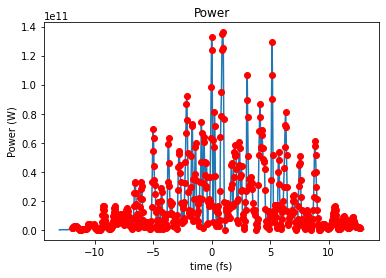

In [5]:
prop_path = '/gpfs/exfel/data/user/juncheng/hydratedProject/data/simulation/prop/prop_out_0000001.h5'
photon_analysis = XFELPhotonAnalysis(input_path=prop_path)
photon_analysis.plotTotalPower()

## Ionization with GROMACS

In [ ]:
# pmi_parameters = {"number_of_trajectories" : 1,
#                   "random_rotation" : False}
# photon_matter_interactor=GROMACSPhotonMatterInteractor(parameters=pmi_parameters,
#                                                          input_path='prop_out.h5',
#                                                          output_path='pmi_out.h5',
#                                                          sample_path='5udc.pdb')

In [ ]:
# photon_matter_interactor.backengine()
# photon_matter_interactor.saveH5()

## Scattering with pysingfel

In [ ]:
p0 = DetectorPanel(ranges={
    'fast_scan_min': 0,
    'fast_scan_max': 80,
    'slow_scan_min': 0,
    'slow_scan_max': 80
},
                   pixel_size=1200e-6 * meter,
                   photon_response=1.0,
                   distance_from_interaction_plane=0.10 * meter,
                   corners={
                       'x': -40,
                       'y': -40
                   },
                   fast_scan_xyz='1.0x',
                   slow_scan_xyz='1.0y')
detector_geometry = DetectorGeometry(panels=[p0])
diffraction_parameters = SingFELPhotonDiffractorParameters(
                                               uniform_rotation=False,
                                               calculate_Compton = True,
                                               slice_interval=1,
                                               number_of_slices=50,
                                               number_of_diffraction_patterns=1,
                                               pmi_start_ID = 1,
                                               pmi_stop_ID  = 1,
                                               detector_geometry=detector_geometry
                                               )
diffractor = SingFELPhotonDiffractor(parameters=diffraction_parameters,
                                     input_path='pmi_out.h5',
                                     output_path='diffr.h5')

## Plot diffraction pattern

In [ ]:
analysis = DiffractionAnalysis('diffr.h5', poissonize=False)
analysis.plotPattern(logscale=True)